# 🔍 Azure AI Custom Vision for Object Detection
# Part 1: Downloading images and labels

<img src="https://connectoricons-prod.azureedge.net/releases/v1.0.1549/1.0.1549.2680/cognitiveservicescustomvision/icon.png">

**Azure AI Custom Vision** is a cloud-based computer vision service from Microsoft that enables developers to build **custom object detection models without requiring deep machine learning expertise**. It's part of Microsoft's Azure Cognitive Services suite and provides a user-friendly approach to training AI models for specific visual recognition tasks.

## ✨ Key Features
- 🎯 **Easy Model Training**: Custom Vision uses a web-based interface where users can upload and label training images. The service handles the underlying machine learning complexities, making it accessible to developers without extensive AI backgrounds.
- 📍 **Object Detection Capabilities**: The service can identify and locate multiple objects within a single image, providing bounding box coordinates for each detected item. This goes beyond simple image classification by pinpointing exactly where objects appear in the image.
- 🎨 **Custom Domain Focus**: Unlike general-purpose vision APIs, Custom Vision allows you to train models on your specific use cases, whether that's detecting manufacturing defects, identifying wildlife species, or recognizing retail products.

## ⚙️ How It Works

- **The training process** involves uploading labeled images to teach the model what to look for. You draw bounding boxes around objects of interest and assign tags to create training data. The service then uses transfer learning techniques to adapt pre-trained neural networks to your specific domain.
- 📊 **Performance Optimization**: The platform provides metrics like precision and recall to help evaluate model performance, and supports iterative improvement through additional training data and model refinement.
- 🚀 **Deployment Options**: Trained models can be consumed via REST APIs for cloud-based inference, or exported to run locally on edge devices including mobile platforms and IoT devices.

## 💼 Common Applications
Custom Vision object detection is particularly valuable for industrial inspection, retail inventory management, medical imaging analysis, agricultural monitoring, and security surveillance applications where standard vision APIs may not provide the specialized recognition capabilities needed.
The service integrates well with other Azure services and supports various programming languages through SDKs, making it a practical choice for organizations already using Microsoft's cloud ecosystem.

## 📄 Documentation
- https://www.customvision.ai/projects
- https://learn.microsoft.com/en-us/azure/ai-services/Custom-Vision-Service/overview
- https://learn.microsoft.com/en-us/azure/ai-services/custom-vision-service/get-started-build-detector

## 1. Settings

In [1]:
import datetime
import glob
import os
import kagglehub
import shutil
import sys
import time

from PIL import Image

In [2]:
sys.version

'3.10.18 (main, Jun  5 2025, 13:14:17) [GCC 11.2.0]'

In [3]:
print(f"Today is {datetime.datetime.today().strftime('%d-%b-%Y %H:%M:%S')}")

Today is 08-Oct-2025 07:15:14


## 2. Downloading images

> Source: https://www.kaggle.com/alexj21/swimming-pool-512x512

<img src="https://cdn-images-1.medium.com/max/1200/0*kbWFs2dOILw7abke.png">

In [4]:
IMAGES_DIR = 'images'

os.makedirs(IMAGES_DIR, exist_ok=True)

In [5]:
TRAIN_DIR = os.path.join(IMAGES_DIR, 'train')

os.makedirs(TRAIN_DIR, exist_ok=True)

### Downloading images & labels

In [6]:
start = time.time()

kagglehub.dataset_download("alexj21/swimming-pool-512x512")

elapsed = time.time() - start
minutes, seconds = divmod(elapsed, 60)
print(f"\nElapsed time = {minutes:.0f} minutes and {seconds:.0f} seconds")

100%|██████████| 1.62G/1.62G [00:45<00:00, 38.4MB/s]

Extracting files...



Elapsed time = 1 minutes and 1 seconds


## 3. Data management

In [7]:
CACHE_DIR = "/home/azureuser/.cache/kagglehub/datasets/alexj21/swimming-pool-512x512/versions/5"

In [8]:
!ls $CACHE_DIR -lh

total 862M
drwxr-xr-x 3 azureuser azureuser 4.0K Oct  8 07:16 CANNES_TILES_512x512_PNG
drwxr-xr-x 3 azureuser azureuser 4.0K Oct  8 07:16 CANNES_TILES_512x512_labels
-rw-r--r-- 1 azureuser azureuser 145M Oct  8 07:16 TEST_SET.4.png
-rw-r--r-- 1 azureuser azureuser 287M Oct  8 07:16 TEST_SET.4.tif
-rw-r--r-- 1 azureuser azureuser 145M Oct  8 07:16 TEST_SET_ALPES_MARITIMES.3.png
-rw-r--r-- 1 azureuser azureuser 287M Oct  8 07:16 TEST_SET_ALPES_MARITIMES.3.tif


In [9]:
source = os.path.join(CACHE_DIR, "CANNES_TILES_512x512_PNG/CANNES_TILES_512x512_PNG")
destination = os.path.join(TRAIN_DIR, "png")

start = time.time()

print(f"🔄 Moving images from '{source}' to '{destination}'...")
shutil.move(source, destination)

elapsed = time.time() - start
minutes, seconds = divmod(elapsed, 60)
print(f"\n✅ Done. Elapsed time = {minutes:.0f} minutes and {seconds:.0f} seconds")

🔄 Moving images from '/home/azureuser/.cache/kagglehub/datasets/alexj21/swimming-pool-512x512/versions/5/CANNES_TILES_512x512_PNG/CANNES_TILES_512x512_PNG' to 'images/train/png'...

✅ Done. Elapsed time = 3 minutes and 45 seconds


In [10]:
source = os.path.join(CACHE_DIR, "CANNES_TILES_512x512_labels/CANNES_TILES_512x512_labels")
destination = os.path.join(TRAIN_DIR, "labels")

start = time.time()

print(f"🔄 Moving labels from '{source}' to '{destination}'...")
shutil.move(source, destination)

elapsed = time.time() - start
minutes, seconds = divmod(elapsed, 60)
print(f"\n✅ Done. Elapsed time = {minutes:.0f} minutes and {seconds:.0f} seconds")

🔄 Moving labels from '/home/azureuser/.cache/kagglehub/datasets/alexj21/swimming-pool-512x512/versions/5/CANNES_TILES_512x512_labels/CANNES_TILES_512x512_labels' to 'images/train/labels'...

✅ Done. Elapsed time = 1 minutes and 4 seconds


In [11]:
CACHE_MAIN_DIR = "/home/azureuser/.cache/kagglehub/"

if os.path.exists(CACHE_MAIN_DIR):
    shutil.rmtree(CACHE_MAIN_DIR)
    print(f"✅ Done. Directory {CACHE_MAIN_DIR} is deleted.")
else:
    print(f"❌ Path does not exist: {CACHE_MAIN_DIR}")

✅ Done. Directory /home/azureuser/.cache/kagglehub/ is deleted.


## 4. Images and labels

In [12]:
os.listdir(IMAGES_DIR)

['train']

In [13]:
os.listdir(TRAIN_DIR)

['labels', 'png']

In [14]:
PNG_DIR = os.path.join(TRAIN_DIR, "png")
LABELS_DIR = os.path.join(TRAIN_DIR, "labels")

In [15]:
# Keep only the image file that have a label file
image_ext = ".png"
label_ext = ".xml"

label_basenames = {
    os.path.splitext(f)[0]
    for f in os.listdir(LABELS_DIR) if f.endswith(label_ext)
}

for file in os.listdir(PNG_DIR):
    if file.endswith(image_ext):
        base_name = os.path.splitext(file)[0]
        if base_name not in label_basenames:
            os.remove(os.path.join(PNG_DIR, file))

### Image example

In [16]:
image_file = os.path.join(PNG_DIR, "CANNES_TILES_512x512.618.png")
label_file = os.path.join(LABELS_DIR, "CANNES_TILES_512x512.618.xml")

In [17]:
!ls $image_file -lh

-rwxrwxrwx 1 root root 413K Oct  8 07:16 images/train/png/CANNES_TILES_512x512.618.png


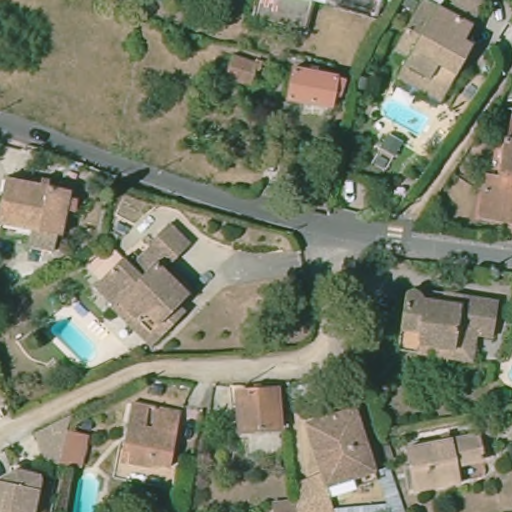

In [18]:
img = Image.open(image_file)
img

In [19]:
!ls $label_file -lh

-rwxrwxrwx 1 root root 1014 Oct  8 07:16 images/train/labels/CANNES_TILES_512x512.618.xml


In [20]:
with open(label_file, 'r') as f:
    print(f.read())

<annotation>
	<folder>CANNES_TILES_512x512</folder>
	<filename>CANNES_TILES_512x512.618.tif</filename>
	<path>F:\CANNES_TILES_512x512\CANNES_TILES_512x512.618.tif</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>512</width>
		<height>512</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>pool</name>
		<pose>Unspecified</pose>
		<truncated>1</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>71</xmin>
			<ymin>468</ymin>
			<xmax>105</xmax>
			<ymax>512</ymax>
		</bndbox>
	</object>
	<object>
		<name>pool</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>47</xmin>
			<ymin>315</ymin>
			<xmax>100</xmax>
			<ymax>361</ymax>
		</bndbox>
	</object>
	<object>
		<name>pool</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>377</xmin>
			<ymin>93</ymin>
			<xmax>433</xmax>
			<ymax>139</ymax>
		</bndbox>
	</object>


> The existing references images to .tif files instead of png. So let's do the updates to all labels files.

In [21]:
def replace_str1_with_str2(directory_path: str, str1: str, str2: str):
    """
    Replace all occurrences of 'str1' with 'str2' in XML files
    
    Args:
        directory_path: Path to directory containing XML files
    """
    # Find all XML files in the directory
    xml_files = glob.glob(os.path.join(directory_path, '*.xml'))
    
    if not xml_files:
        print("❌ No XML files found in the directory.")
        return
    
    processed_count = 0
    
    for xml_file in xml_files:
        try:
            # Read the file
            with open(xml_file, 'r', encoding='utf-8') as file:
                content = file.read()
            
            # Replace 'tif' with 'png'
            updated_content = content.replace(str1, str2)
            
            # Write back only if there were changes
            if updated_content != content:
                with open(xml_file, 'w', encoding='utf-8') as file:
                    file.write(updated_content)
                processed_count += 1
            else:
                print(f"ℹ️ No changes needed: {xml_file}")
                
        except Exception as e:
            print(f"❌ Error processing {xml_file}: {e}")
    
    print(f"✅ Done: Updated {processed_count} files in {directory_path}.")

In [22]:
replace_str1_with_str2(LABELS_DIR, "tif", "png")

✅ Done: Updated 1224 files in images/train/labels.


> The XML files no longer include references to the TIFF files

In [23]:
with open(label_file, 'r') as f:
    print(f.read())

<annotation>
	<folder>CANNES_TILES_512x512</folder>
	<filename>CANNES_TILES_512x512.618.png</filename>
	<path>F:\CANNES_TILES_512x512\CANNES_TILES_512x512.618.png</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>512</width>
		<height>512</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>pool</name>
		<pose>Unspecified</pose>
		<truncated>1</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>71</xmin>
			<ymin>468</ymin>
			<xmax>105</xmax>
			<ymax>512</ymax>
		</bndbox>
	</object>
	<object>
		<name>pool</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>47</xmin>
			<ymin>315</ymin>
			<xmax>100</xmax>
			<ymax>361</ymax>
		</bndbox>
	</object>
	<object>
		<name>pool</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>377</xmin>
			<ymin>93</ymin>
			<xmax>433</xmax>
			<ymax>139</ymax>
		</bndbox>
	</object>


In [24]:
nb_png = 0

for filename in os.listdir(PNG_DIR):
    if filename.endswith('.png'):
        nb_png += 1

print(f"🖼️ Total of .png images files = {nb_png}")

🖼️ Total of .png images files = 1224


In [25]:
nb_xml = 0

for filename in os.listdir(LABELS_DIR):
    if filename.endswith('.xml'):
        nb_xml += 1

print(f"🏷️ Total of .xml labels files = {nb_xml}")

🏷️ Total of .xml labels files = 1224


> Go to next notebook